# Experimental Procedure 

Begin by using your computer software to create 100 samples each of size 20 from the C+E model $Y =\mu + \epsilon$, with $\epsilon \sim N(0,\sigma^{2})$, for your choice of $\mu$ and $\sigma^{2}$. For each sample, calculate a level 0.95 confidence interval for $\mu$.

 - Count the number of intervals that do not contain μ. How does this number compare with what you expect from the confidence level 0.95?
 - Record the mean width of the intervals.

## The Confidence Intervals for the Means
*Note*: The formula for a *$100(1 - \alpha)$* confidence interval estimate of the mean is as follows:

$(\bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, \ \ \bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}})$

Where *$\bar{x}$* denotes the observed value of the sample mean.

In [347]:
n = 20 # sample size
n_samples = 100

mu = 5
sigma = 10
alpha = .05
std = sigma / sqrt(n)

construct_cis = function (n_samples) {
    mx = matrix(rnorm(n_samples * n, mean=mu, sd=sigma), ncol=n)
    cis_l = cis_u = rep(NA, n_samples)
    x_bars = rep(NA, n_samples)

    for (i in 1:n_samples) {
        x_bar = mean(mx[i,])
        x_bars[i] = x_bar

        z_a2 = qnorm(alpha/2, 0, 1, lower.tail=F)
        cis_l[i] = x_bar - z_a2 * std
        cis_u[i] = x_bar + z_a2 * std
    }

    head(ci)
    
    return(data.frame(x_bars=x_bars, cis_l=cis_l, cis_u=cis_u))
}

output = construct_cis(n_samples)

In [353]:
head(output)

x_bars,cis_l,cis_u
4.465949,0.08333665,8.848562
5.753732,1.37111909,10.136344
9.100959,4.71834648,13.483572
4.182115,-0.20049814,8.564727
7.941013,3.55840013,12.323626
4.286416,-0.09619648,8.669029


## CI Plot 

no. of intervels do not contain mu 3 
% inteverals contain mu 0.97 


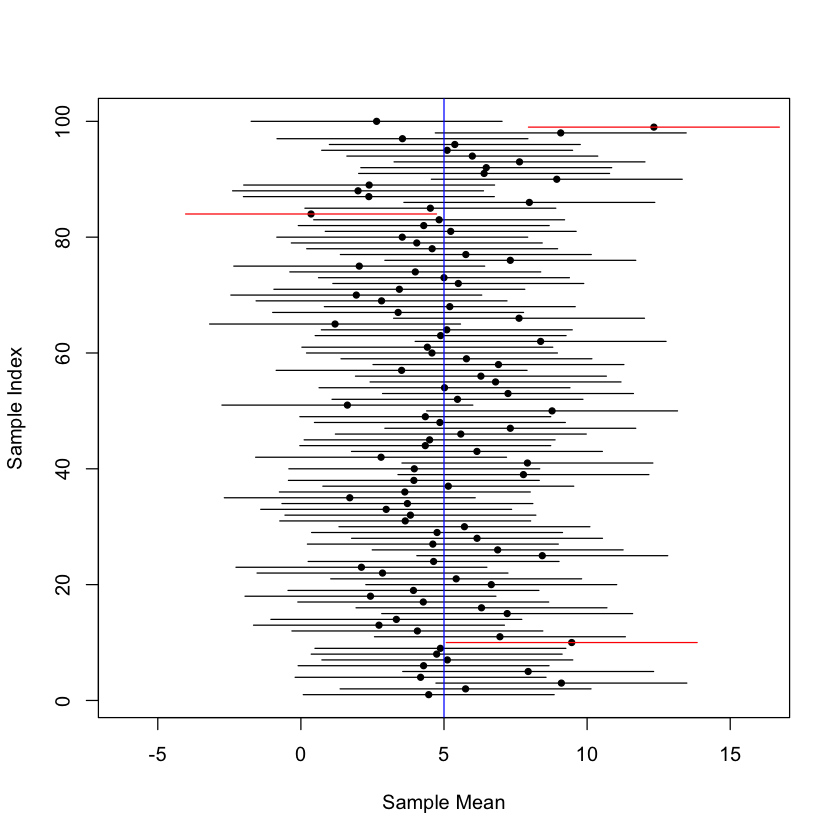

In [393]:
library(dplyr)

plot_intervals = function(output) {
    # number of intervals do not contain mu
    count = 0
    x_bars = output$x_bars
    cis_l = output$cis_l
    cis_u = output$cis_u

    n_samples = length(x_bars)
    
    plot(x_bars, 1:n_samples, pch=20, xlim=c(mu - 5*std, mu + 5*std), xlab='Sample Mean', ylab='Sample Index')

    for (i in 1:length(cis_l)) {
        col = 'black'
        if ( ! between(mu, cis_l[i], cis_u[i]) ) {
            count = count+1
            col = 'red'
        }

        segments(cis_l[i], i, cis_u[i], i, col=col)
    }

    abline(v=mu, col='blue')
    cat('no. of intervels do not contain mu', count, "\n")
    cat('% inteverals contain mu', (n_samples - count)/n_samples, "\n")
}

plot_intervals(output)

no. of intervels do not contain mu 24 
% inteverals contain mu 0.952 


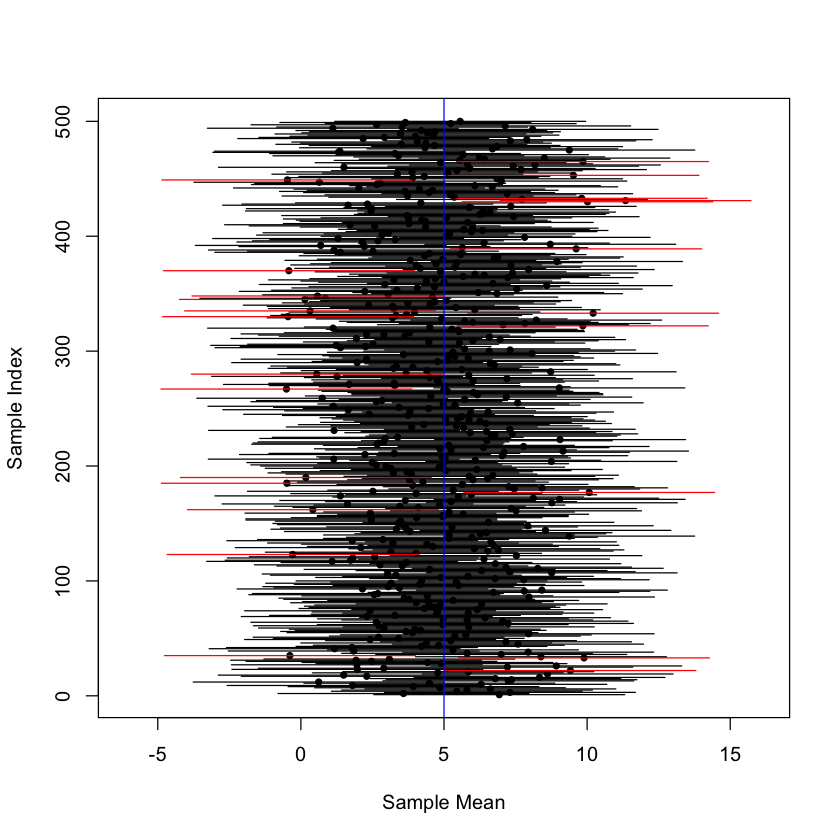

In [394]:
n_samples = 500

plot_intervals(construct_cis(n_samples))